In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords #for cleaning
from nltk.stem import LancasterStemmer ##for cleaning
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\gauri\\spam.csv" ,encoding=('ISO-8859-1'))

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
data.shape

(5572, 5)

In [9]:
data.size

27860

In [10]:
data.ndim

2

In [11]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [12]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [13]:
x

array([['ham',
        'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
        nan, nan],
       ['ham', 'Ok lar... Joking wif u oni...', nan, nan],
       ['spam',
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
        nan, nan],
       ...,
       ['ham',
        'Pity, * was in mood for that. So...any other suggestions?', nan,
        nan],
       ['ham',
        "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
        nan, nan],
       ['ham', 'Rofl. Its true to its name', nan, nan]], dtype=object)

In [14]:
y

array([nan, nan, nan, ..., nan, nan, nan], dtype=object)

In [15]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [16]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [17]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_

True

In [18]:
print(data.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [19]:
print(data.columns.str.contains('Message'))


[False False False False False]


In [23]:
stop_words = set(stopwords.words('english'))
stemmer = LancasterStemmer()
def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

data["CleanMessage"] = data["v2"].apply(cleaning_data)
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,CleanMessage
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entry wkly comp win cup final tkts may te...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,nah think goes usf lives around though
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,time tried contact pound prize claim easy call...
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,going esplanade home
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,pity mood suggestions
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,guy bitching acted like interested buying some...


In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
import re
import string

# Initialize NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Define cleaning function
def clean_text(text):
    stop_words = set(stopwords.words('english'))
    stemmer = LancasterStemmer()

    text = text.lower()
    text = re.sub(r'@\S+|http\S+|.pic\S+', '', text)  # Combine regex patterns
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Simplify regex pattern
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation

    words = nltk.word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in stop_words and len(word) > 2]
    text = ' '.join(words).strip()  # Simplify joining

    return text

# Apply cleaning function
data["CleanMessage"] = data["v1"].apply(clean_text)
data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,CleanMessage
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,ham
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ham
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,spam
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,ham
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,ham
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,spam
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,ham
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,ham
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,ham


In [27]:
# TfidfVectorizer for "CleanMessage" column
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["CleanMessage"])

# OneHotEncoder for "kind" column
encoder = OneHotEncoder(sparse=False, drop='first')
Y = encoder.fit_transform(data[["v1"]])
X_combined = np.hstack((X.toarray(), Y))

print(X_combined)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


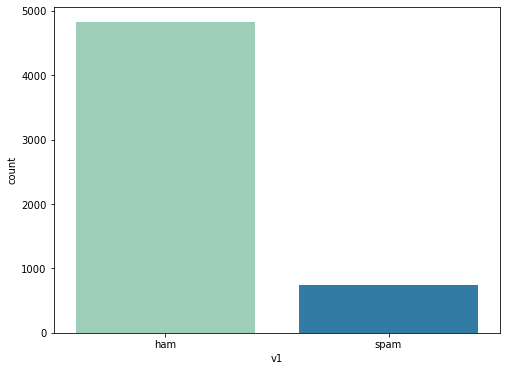

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x="v1", data=data, palette="YlGnBu")
plt.show()
     


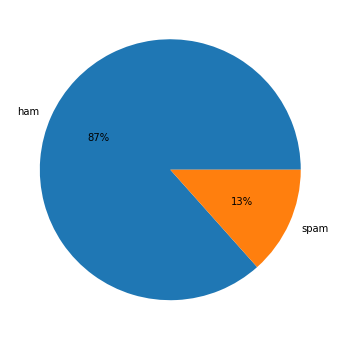

In [31]:
plt.figure(figsize=(8, 6))
kind_counts = data["v1"].value_counts()
plt.pie(kind_counts, labels=kind_counts.index, autopct="%0.0f%%")
plt.show()

In [32]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
     

In [33]:
model = MultinomialNB()
model.fit(X_train,Y_train)
     

MultinomialNB()

In [34]:
model.score(X_train,Y_train)
     

1.0

In [35]:
y_pred = model.predict(X_test)
y_pred
     

array([0., 0., 1., ..., 0., 0., 1.])

In [36]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 1.0


In [37]:
emails = [
    'Hey Mohamed, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = vectorizer.transform(emails)
model.predict(emails_count)

array([0., 0.])